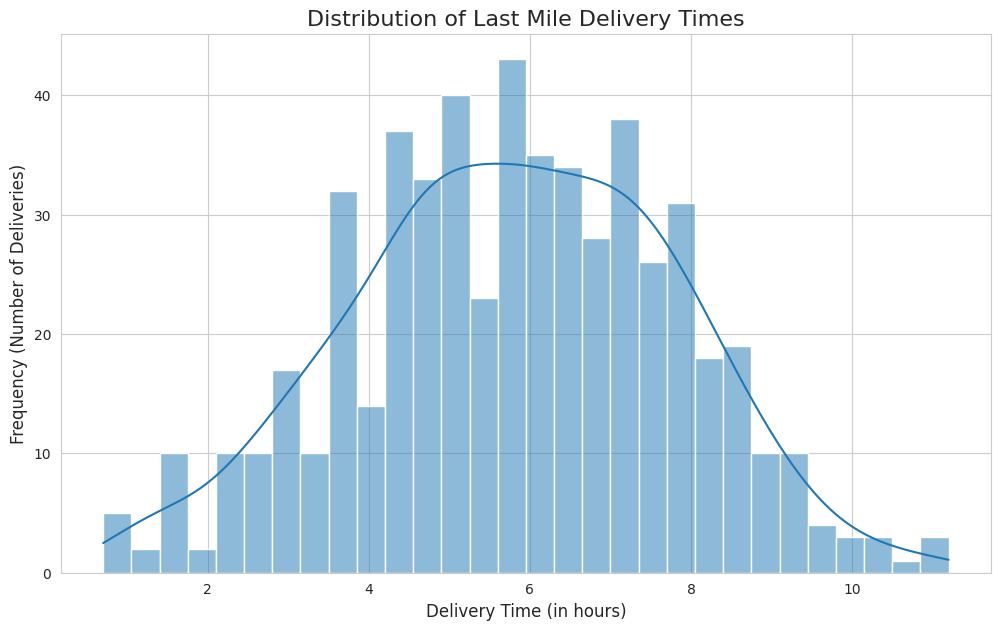

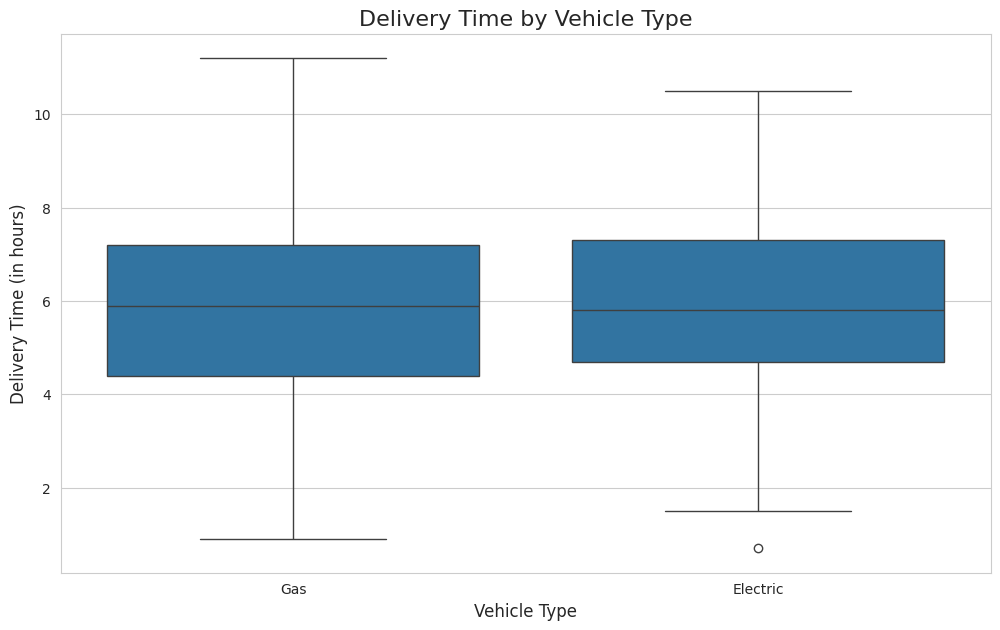

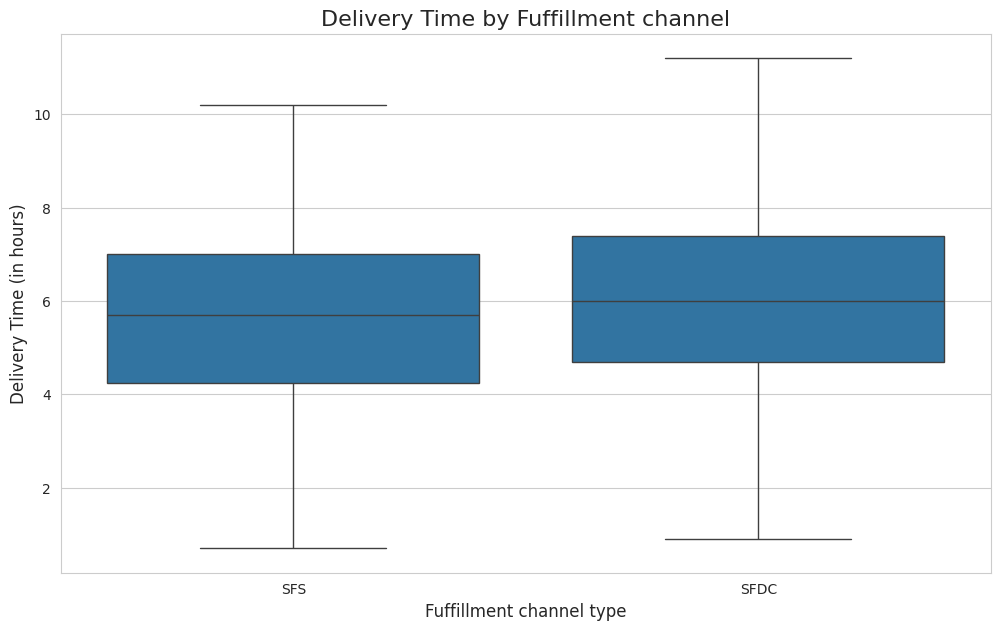

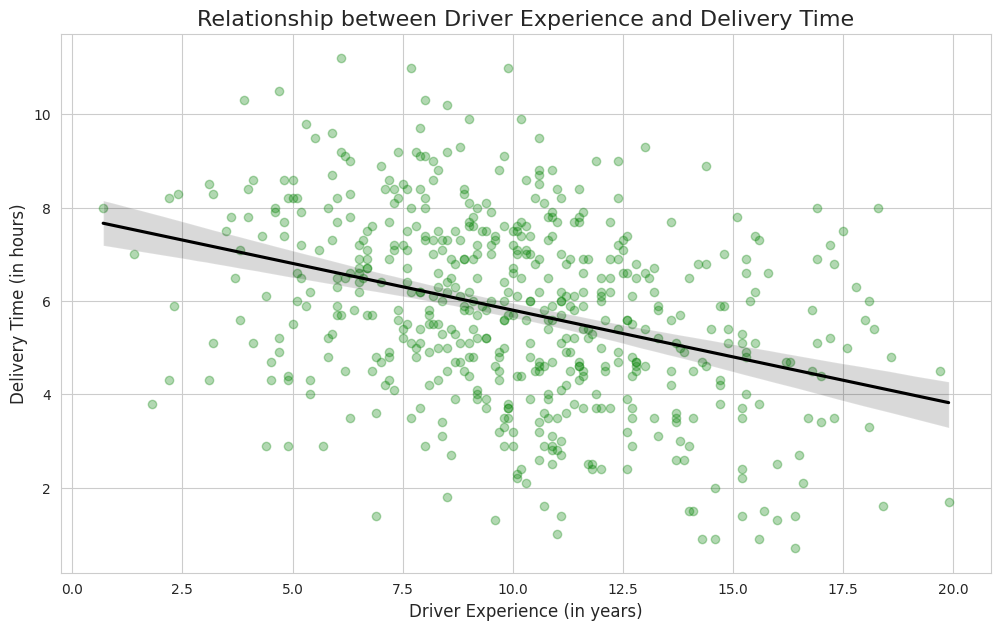

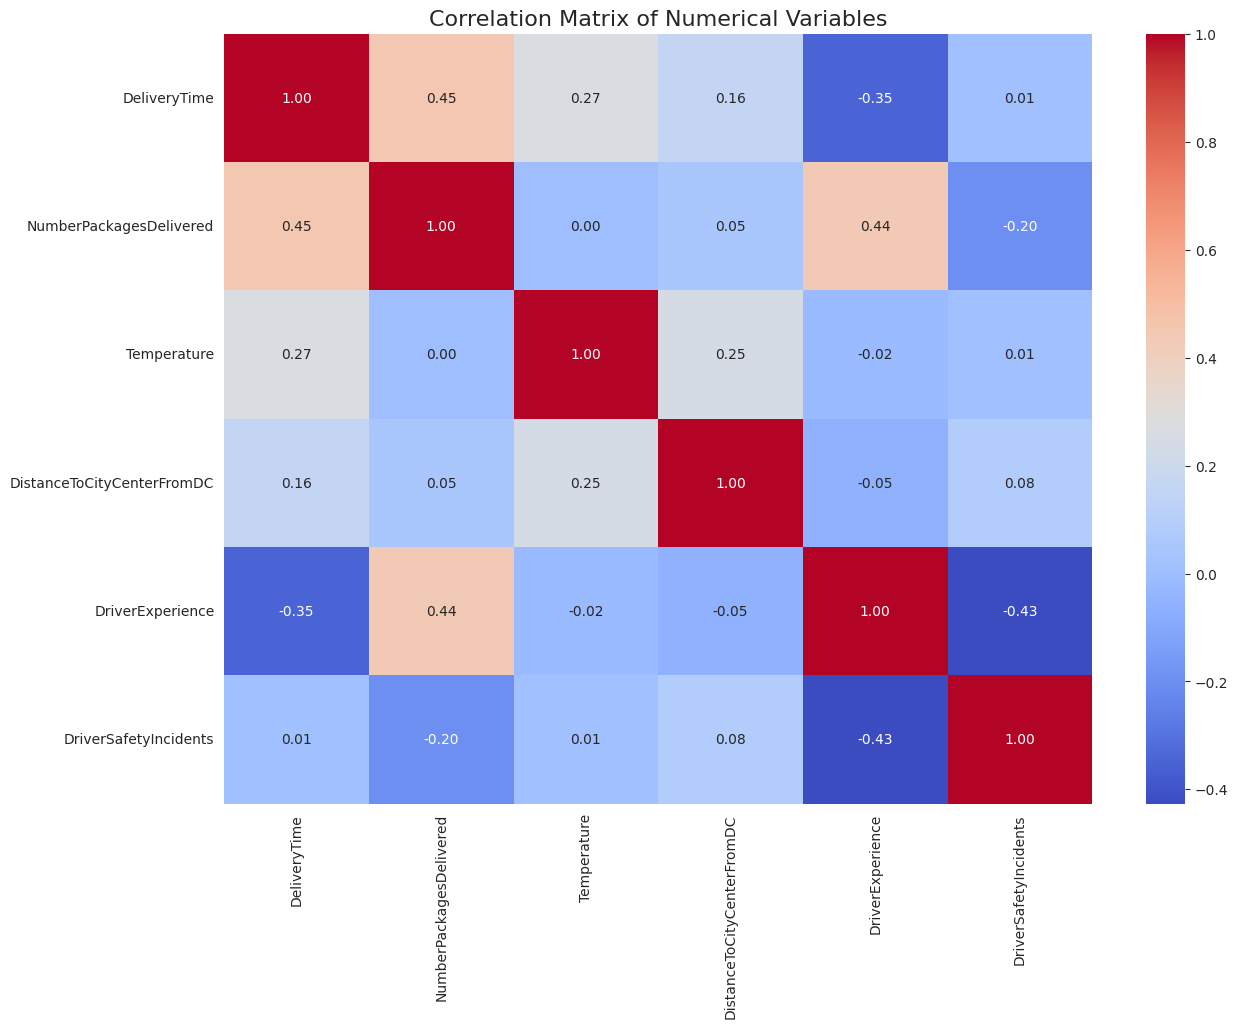

Original number of rows: 551
Number of rows after dropping missing values: 550

--- Final Shapes for Modeling ---
Size of our training features (X_train): (440, 7)
Size of our testing features (X_test): (110, 7)
Size of our training target (y_train): (440,)
Size of our testing target (y_test): (110,)
Linear Regression model has been successfully trained!
First 5 Predicted Delivery Times:
4.709030146530429, 4.636286266282594, 4.548142187649896, 5.668157217252428, 6.015380469667306

First 5 Actual Delivery Times:
6, 5, 4, 7, 7
Mean Absolute Error (MAE): 1.05 hours
R-squared (R²): 0.61


In [18]:
import pandas as pd
df = pd.read_csv("/lastMileDeliveryTimesWithCats.csv")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.histplot(df['DeliveryTime'], bins=30, kde=True)

plt.title('Distribution of Last Mile Delivery Times', fontsize=16)
plt.xlabel('Delivery Time (in hours)', fontsize=12)
plt.ylabel('Frequency (Number of Deliveries)', fontsize=12)

plt.show()


plt.figure(figsize=(12, 7))


sns.boxplot(x='VehicleType', y='DeliveryTime', data=df)

plt.title('Delivery Time by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Delivery Time (in hours)', fontsize=12)


plt.show()

plt.figure(figsize=(12, 7))

sns.boxplot(x='FulfillmentChannel', y='DeliveryTime', data=df)

plt.title('Delivery Time by Fuffillment channel', fontsize=16)
plt.xlabel('Fuffillment channel type', fontsize=12)
plt.ylabel('Delivery Time (in hours)', fontsize=12)

# --- Create a Scatter Plot for Driver Experience vs. Delivery Time ---

plt.figure(figsize=(12, 7))

# This time, we set the x-axis to 'DriverExperience'
sns.regplot(x='DriverExperience', y='DeliveryTime', data=df,
            scatter_kws={'alpha':0.3, 'color':'green'},
            line_kws={'color':'black'})

plt.title('Relationship between Driver Experience and Delivery Time', fontsize=16)
plt.xlabel('Driver Experience (in years)', fontsize=12)
plt.ylabel('Delivery Time (in hours)', fontsize=12)

plt.show()

# --- Create a Correlation Heatmap ---

plt.figure(figsize=(14, 10))

# First, we need to calculate the correlation matrix for the numerical columns only.
# We'll select only the columns we want to include.
numerical_cols = ['DeliveryTime', 'NumberPackagesDelivered', 'Temperature',
                  'DistanceToCityCenterFromDC', 'DriverExperience', 'DriverSafetyIncidents']
correlation_matrix = df[numerical_cols].corr()

# Now, we use seaborn to create the heatmap.
# 'annot=True' writes the correlation number in each cell.
# 'cmap='coolwarm'' sets a nice color scheme where positive is warm and negative is cool.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

plt.show()


# 1. Load the original data
df = pd.read_csv('/lastMileDeliveryTimesWithCats.csv')

# 2. THE FIX: Drop any rows that have missing values.
#    This creates a new, clean DataFrame.
print(f"Original number of rows: {len(df)}")
df_clean = df.dropna()
print(f"Number of rows after dropping missing values: {len(df_clean)}")


# 3. One-Hot Encode the clean DataFrame
df_processed = pd.get_dummies(df_clean, columns=['VehicleType', 'FulfillmentChannel'], drop_first=True).astype(int)

# 4. Define your Features (X) and Target (y) from the processed data
y = df_processed['DeliveryTime']
X = df_processed.drop('DeliveryTime', axis=1)

# 5. Split the clean data into Training and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. VERIFY THE FINAL SHAPES
print("\n--- Final Shapes for Modeling ---")
print(f"Size of our training features (X_train): {X_train.shape}")
print(f"Size of our testing features (X_test): {X_test.shape}")
print(f"Size of our training target (y_train): {y_train.shape}")
print(f"Size of our testing target (y_test): {y_test.shape}")

# --- PHASE 4, STEP 1: TRAIN THE LINEAR REGRESSION MODEL ---

# Import the LinearRegression model from scikit-learn's library of linear models
from sklearn.linear_model import LinearRegression

# Create an instance of the model. We'll name our model 'lr_model' (for linear regression model)
lr_model = LinearRegression()

# Now, we train the model. The .fit() method teaches the model the relationship
# between our features (X_train) and our target (y_train).
# This is the most important step!
lr_model.fit(X_train, y_train)

print("Linear Regression model has been successfully trained!")

# Use the trained model to make predictions on the test set features (X_test)
predictions = lr_model.predict(X_test)

# Let's look at the first 5 predictions our model made
# and compare them to the first 5 actual values from the test set.
print("First 5 Predicted Delivery Times:")
print(", ".join(map(str, predictions[:5])))

print("\nFirst 5 Actual Delivery Times:")
print(", ".join(map(str, y_test.head().values)))

# Import the functions for our evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error (MAE)
# This tells us, on average, how many hours our predictions were off by.
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f} hours")

# Calculate the R-squared (R²) score
# This tells us what percentage of the variability in the DeliveryTime our model can explain.
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2:.2f}")